# Multiclass Classification Neural Network With Fashion MNIST Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# The data has already has been splitted
(train_data, train_labels), (test_data, test_labels)= fashion_mnist.load_data()

## Exploring The Data

In [2]:
print(f"Training Sample : \n {train_data[0]} \n")
print(f"Training Label : \n {train_labels[0]} \n")

Training Sample : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

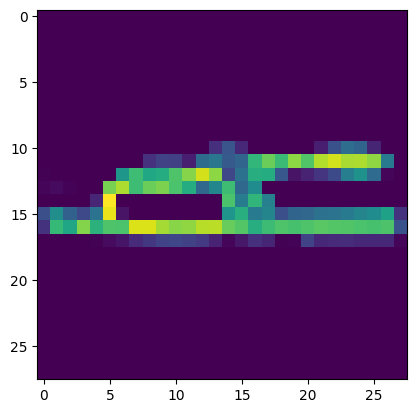

In [4]:
plt.imshow(train_data[np.random.randint(0,len(train_data))]) # Plotting a random training example

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)


10

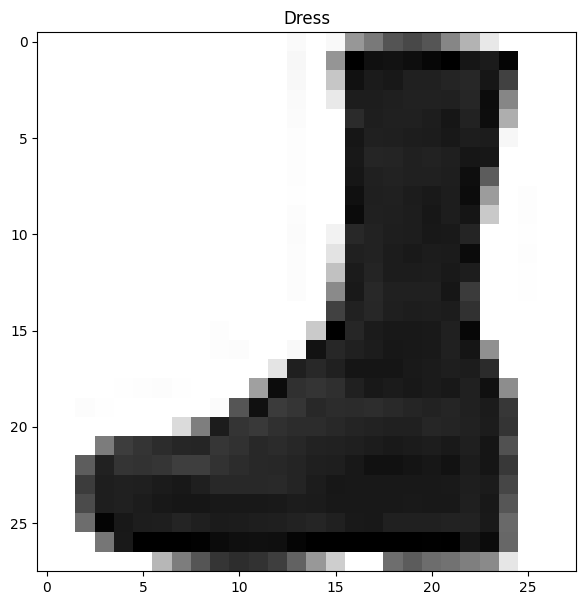

In [6]:
np.random.randint(0,len(train_data))
plt.figure(figsize=(7,7))
plt.imshow(train_data[np.random.randint(0,len(train_data))], cmap = plt.cm.binary)
plt.grid(False)
plt.title(class_names[train_labels[np.random.randint(0,len(train_data))]])
plt.show()

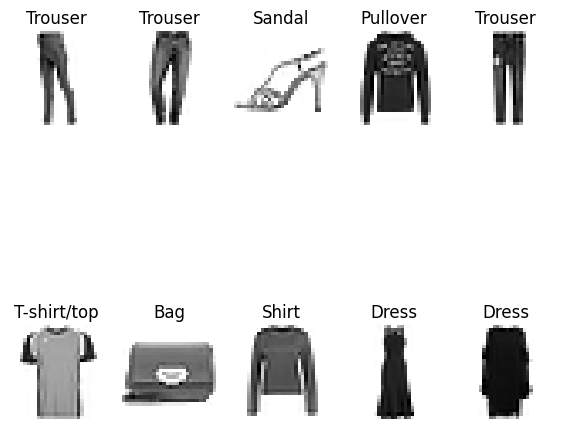

In [7]:
plt.figure(figsize= (7,7))
import random
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)
plt.show()

## Creating The Multiclass Classification Model

In [8]:
#Set random seed for reproducibility
tf.random.set_seed(42)

# Model Creation
model_1_nonnormalized = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_1_nonnormalized.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = (["accuracy"]))
# Fit the model
history_1_nonnormalized = model_1_nonnormalized.fit(train_data,
                        train_labels,
                        epochs = 15,
                        validation_data = (test_data, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.1007 - loss: 3.3270 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.0983 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1802 - loss: 2.0895 - val_accuracy: 0.2745 - val_loss: 1.8031
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2791 - loss: 1.7613 - val_accuracy: 0.3118 - val_loss: 1.5868
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3206 - loss: 1.5704 - val_accuracy: 0.3213 - val_loss: 1.5182
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3287 - loss: 1.5096 - val_accuracy: 0.3224 - val_loss: 1.4767
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3365 - loss: 1.4727 

### Normalize the Data

In [9]:
train_data_normalized = train_data /255.0
test_data_normalized = test_data/255.0

In [10]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Model Creation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = (["accuracy"]))
# Fit the model
history_2 = model_2.fit(train_data_normalized,
                        train_labels,
                        epochs = 15,
                        validation_data = (test_data_normalized, test_labels))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3521 - loss: 1.6687 - val_accuracy: 0.6251 - val_loss: 0.9609
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6421 - loss: 0.9005 - val_accuracy: 0.7009 - val_loss: 0.7976
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7072 - loss: 0.7604 - val_accuracy: 0.7327 - val_loss: 0.6921
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7493 - loss: 0.6741 - val_accuracy: 0.7578 - val_loss: 0.6553
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7653 - loss: 0.6406 - val_accuracy: 0.7649 - val_loss: 0.6389
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7735 - loss: 0.6216 - val_accuracy: 0.7712 - val_loss: 0.6299
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7781 - loss: 0.6084 - val_accuracy: 0.7741 - val_loss: 0.6221
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7816 - loss: 0.5977 - 

### Plotting Non-Normalized Data Performance vs Normalize Data Performance on Model

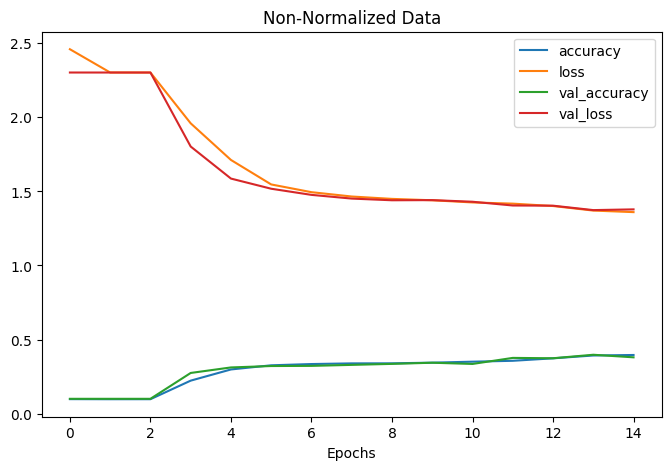

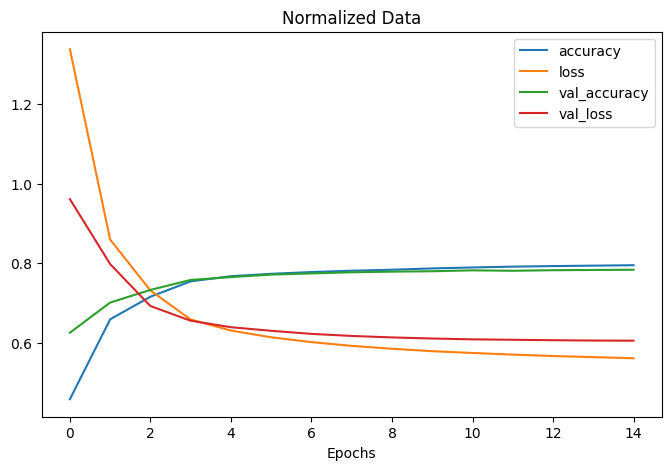

In [12]:
pd.DataFrame(history_1_nonnormalized.history).plot(figsize=(8,5), title = 'Non-Normalized Data', xlabel='Epochs')
pd.DataFrame(history_2.history).plot(figsize=(8,5), title = "Normalized Data", xlabel= "Epochs") ;

### Finding The Ideal Learning Rate Using Learning Rate Schedualar

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
    ])
# Compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = (["accuracy"]))

# Create a learning rate call back
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
fit_lr_history = model_3.fit(train_data_normalized,
                              train_labels,
                              epochs = 40,
                              validation_data = (test_data_normalized, test_labels), callbacks = [lr_schedular])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2970 - loss: 1.7341 - val_accuracy: 0.5500 - val_loss: 1.0574 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5889 - loss: 1.0195 - val_accuracy: 0.6221 - val_loss: 0.9534 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6392 - loss: 0.9255 - val_accuracy: 0.6538 - val_loss: 0.8743 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6638 - loss: 0.8603 - val_accuracy: 0.6829 - val_loss: 0.8376 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6791 - loss: 0.8294 - val_accuracy: 0.6963 - val_loss: 0.8183 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6905 - loss: 0.8083 - val_accuracy: 0.7030 - val_loss: 0.8010 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7004 - l

In [14]:
learning_rates = 1e-3*(10**(tf.range(40)/20))
learning_rates.shape

TensorShape([40])

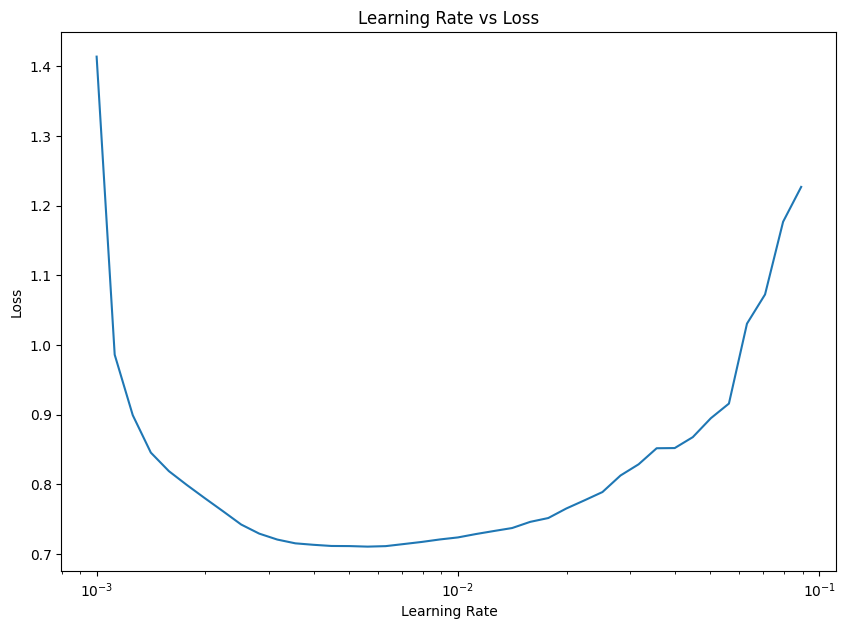

In [15]:
plt.figure(figsize = (10,7))
plt.semilogx(learning_rates, fit_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

### Refitting The Model With The Ideal Learning Rate

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
#Compile model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics= (["accuracy"]))

# Fit the model
history_4 = model_4.fit(train_data_normalized,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_normalized, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3723 - loss: 1.6202 - val_accuracy: 0.5888 - val_loss: 1.0272
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6212 - loss: 0.9793 - val_accuracy: 0.6586 - val_loss: 0.8904
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6772 - loss: 0.8579 - val_accuracy: 0.6994 - val_loss: 0.8144
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7136 - loss: 0.7831 - val_accuracy: 0.7233 - val_loss: 0.7656
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7380 - loss: 0.7284 - val_accuracy: 0.7404 - val_loss: 0.7261
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7547 - loss: 0.6873 - val_accuracy: 0.7510 - val_loss: 0.7019
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7637 - loss: 0.6620 - val_accuracy: 0.7573 - val_loss: 0.6833
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7696 - loss: 0.6459 - 

### Evaluating The Model

In [17]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [18]:
y_probabilities = model_4.predict(test_data_normalized)
y_probabilities[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([8.04069913e-08, 3.96521151e-04, 8.50184723e-09, 9.06685545e-06,
       2.99988255e-06, 1.75903618e-01, 1.63697848e-07, 2.19081849e-01,
       1.03740376e-07, 6.04605615e-01], dtype=float32)

In [19]:
tf.argmax(y_probabilities[0]), class_names[tf.argmax(y_probabilities[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

In [20]:
y_preds = y_probabilities.argmax(axis = 1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [21]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = test_labels,
                      y_pred = y_preds)
cm

array([[708,   2,  11,  86,   5,   4, 138,   0,  46,   0],
       [  1, 949,   1,  22,  14,   0,   9,   0,   2,   2],
       [ 14,   1, 515,  13, 185,   0, 254,   0,  18,   0],
       [ 43,  27,   5, 823,  31,   1,  57,   1,  12,   0],
       [  1,   5, 112,  28, 769,   0,  74,   3,   8,   0],
       [  0,   0,   0,   3,   0, 872,   0,  67,  14,  44],
       [134,   3, 151,  59, 111,   0, 483,   1,  58,   0],
       [  0,   0,   0,   0,   0,  36,   0, 945,   0,  19],
       [  5,   0,   0,  12,   5,  28,  51,  20, 879,   0],
       [  0,   2,   0,   0,   0,  25,   0,  66,   1, 906]])

#### Choosing Random Images From The Data With It's Prediction Accuracy

In [23]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and true label
  """

  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of titles depending on the prediction
  if pred_label == true_label :
    color = "green"
  else :
    color = "red"

  plt.xlabel("Pred {} {:2.0f}% (True: {})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
            color = color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


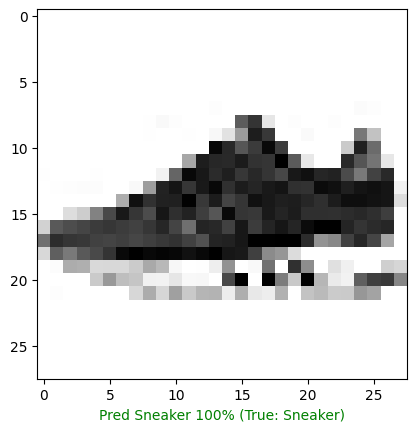

In [30]:
plot_random_image(model = model_4,
                  images = test_data_normalized,
                  true_labels = test_labels,
                  classes = class_names)

In [24]:
model_4.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [25]:
weights, biases = model_4.layers[1].get_weights()
weights, weights.shape

(array([[ 0.53909993, -0.6159455 ,  0.0669093 ,  0.07470317],
        [ 1.1991056 ,  0.09431829,  0.05325009,  0.08210754],
        [-0.00581903, -0.5492669 ,  0.07700956,  1.6094446 ],
        ...,
        [ 0.20269158,  0.50058806,  0.06671012, -0.46413094],
        [ 0.852166  ,  0.76046526, -0.00867734, -1.1163669 ],
        [ 0.6989083 , -0.33055675,  0.0113577 , -0.3605978 ]],
       dtype=float32),
 (784, 4))

In [26]:
biases, biases.shape

(array([ 1.8615168 ,  0.5329894 , -0.01533308,  1.9859687 ], dtype=float32),
 (4,))

### Model's Graphical Impression

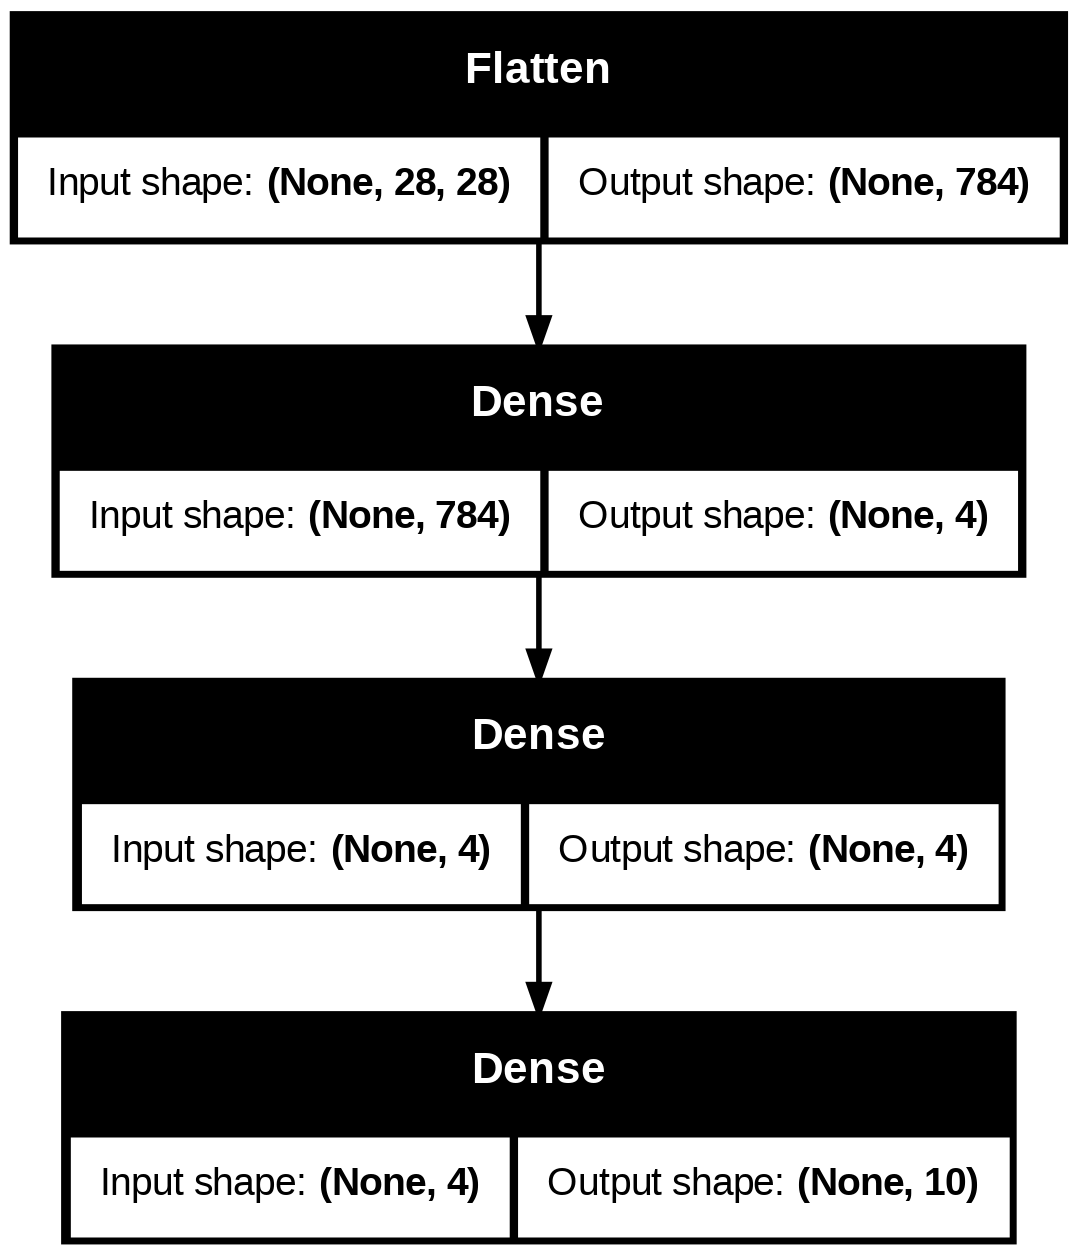

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True)